In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Задание 3

In [2]:
a = np.array([[3, 0],
              [0, -2]])

b = np.array([[0, 2],
              [0, 0],
              [0, 0]])
u, s, v = np.linalg.svd(b)
u[:2, 0]

array([1., 0.])

In [3]:
c = np.array([[1, 1],
              [1, 1]])

In [4]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.patches import Ellipse

def draw_vec(A):
    u, s, v = np.linalg.svd(A)
    v = v.T
    v1 = v[:2, 0]
    v2 = v[:2, 1]
    
    u1 = u[:2, 0]
    u2 = u[:2, 1]
    
    
    figure, ax1 = plt.subplots()
    draw_circle = plt.Circle((0, 0), 1, fill=False)
    plt.plot(0, 0, "o", color='black')
    ax1 = plt.gca()

    plt.arrow(0, 0, v1[0], v1[1], head_width=0.05, fc='red', color='red')
    plt.arrow(0, 0, v2[0], v2[1], head_width=0.05, fc='red', color='red')
    
    ax1.set_aspect(1)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    ax1.add_artist(draw_circle)
    plt.show()
    
    fig, ax2 = plt.subplots()
    print(u1, u2)
    height = np.linalg.norm(A @ v1)
    width = np.linalg.norm(A @ v2)

    draw_ellipse = Ellipse((0, 0), height=height, width=width, fill=False)
  
    plt.plot(0, 0, "o", color='black')

    plt.arrow(0, 0, u1[0], u1[1], head_width=0.05, fc='red', color = 'red')
    plt.arrow(0, 0, u2[0], u2[1], head_width=0.05, fc='red', color='red')
    
    ax2.add_patch(draw_ellipse)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.show()
    

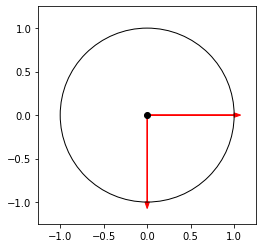

[1. 0.] [0. 1.]


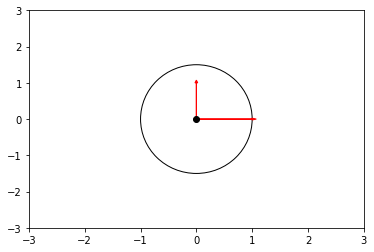

In [5]:

draw_vec(a)

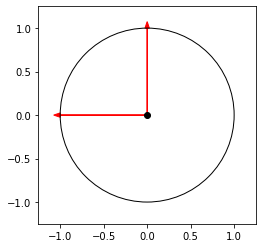

[1. 0.] [0. 1.]


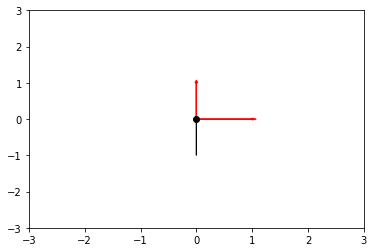

In [6]:
draw_vec(b)

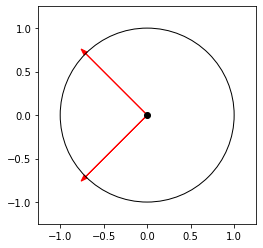

[-0.70710678 -0.70710678] [-0.70710678  0.70710678]


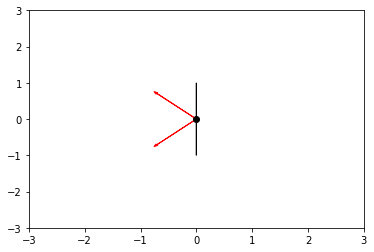

In [7]:
draw_vec(c)

# Задание 5

$ A_{inv} = A^{-1} $
 
$ VA_{inv}U = V \cdot A^{-1} \cdot U $
 
$ G_{inv} = (C + V \cdot A^{-1} \cdot U)^{-1} $

In [8]:
def woodbury(A, U, V):
    A_inv = np.linalg.inv(A)
    VA_invU = V @ A_inv @ U
    C = np.eye(VA_invU.shape[0])
    G_inv = np.linalg.inv(C + VA_invU)
    return A_inv - A_inv @ U @ G_inv @ V @ A_inv

In [13]:
def woodbury_simple(A, U, V):
    '''
    Прямое вычисление 
    '''
    UV = U @ V
    A_UV = A + UV
    return np.linalg.inv(A_UV)

In [10]:
while True:
    p = 500
    k = 10
    diag = np.random.rand(p)
    A = np.diag(diag)
    U = np.random.rand(p, k)
    V = np.random.rand(k, p)
    answ1 = woodbury(A, U, V)
    answ2 = woodbury_simple(A, U, V)
    bool_matrix = (answ1 != answ2)
    if bool_matrix.all():
        print("Wrong!")
        print(answ1)
        print('\n')
        print(answ2)

Wrong!
[[ 4.88572034e+00  9.83280386e-01 -2.47090587e+01 ...  2.75831041e+00
   3.88582720e-01  1.56463104e+00]
 [-5.20421765e-02  2.20910568e+00  6.42834087e+00 ... -5.24789810e-01
  -8.43374737e-02 -3.45722343e-01]
 [-8.81568741e-01  9.77071980e+00 -1.55402967e+02 ...  2.02103506e+01
   3.26559584e+00  1.32950956e+01]
 ...
 [-1.90437494e-01 -2.94780435e-01  7.92210714e+00 ...  1.13418594e+00
  -1.13808952e-01 -4.62894342e-01]
 [-1.03229811e-02  1.63643579e-01 -4.43092457e+00 ...  3.08474924e-01
   1.42993530e+00  2.10623415e-01]
 [-3.45886404e-02 -2.31807284e-01  5.05840325e+00 ... -5.51217909e-01
  -6.66331013e-02  1.34047804e+00]]


[[ 4.88572034e+00  9.83280386e-01 -2.47090587e+01 ...  2.75831041e+00
   3.88582720e-01  1.56463104e+00]
 [-5.20421765e-02  2.20910568e+00  6.42834087e+00 ... -5.24789810e-01
  -8.43374737e-02 -3.45722343e-01]
 [-8.81568741e-01  9.77071980e+00 -1.55402967e+02 ...  2.02103506e+01
   3.26559584e+00  1.32950956e+01]
 ...
 [-1.90437494e-01 -2.94780435e-01  

Wrong!
[[ 3.66391955e+00  4.63712828e+00  6.47626008e+00 ... -3.23794923e+01
   1.56222688e+00 -5.84952564e-01]
 [-1.74599454e+00  2.74462658e+01 -1.18381345e+01 ... -1.23386824e+01
  -2.11821757e+00  1.28388198e+00]
 [-2.77733673e+00 -9.11400263e+00 -3.63654342e+00 ...  7.35759417e+01
  -3.45516236e+00  1.44711766e+00]
 ...
 [ 6.88176766e+01  2.44816084e+02  3.68295069e+02 ... -1.72246713e+03
   8.72012570e+01 -3.38736366e+01]
 [-4.00438719e-01 -1.69955231e+00 -2.04150368e+00 ...  1.23773876e+01
   4.82474054e-01  1.82556898e-01]
 [ 5.68716004e-01  2.28264134e+00  2.95674063e+00 ... -1.58635620e+01
   7.67096041e-01  1.07136301e+00]]


[[ 3.66391955e+00  4.63712828e+00  6.47626008e+00 ... -3.23794923e+01
   1.56222688e+00 -5.84952564e-01]
 [-1.74599454e+00  2.74462658e+01 -1.18381345e+01 ... -1.23386824e+01
  -2.11821757e+00  1.28388198e+00]
 [-2.77733673e+00 -9.11400263e+00 -3.63654342e+00 ...  7.35759417e+01
  -3.45516236e+00  1.44711766e+00]
 ...
 [ 6.88176766e+01  2.44816084e+02  

Wrong!
[[ 1.27826420e+01  1.72359577e+00 -1.12133034e+00 ...  6.64320660e-02
  -4.63948403e-01 -1.74258596e-01]
 [ 7.49115068e-01  5.31969489e+00 -2.50493552e-01 ... -3.62046628e-02
  -8.34798591e-02 -3.97365993e-03]
 [ 3.97034492e+00  1.09289726e+00  3.93584361e+00 ...  4.65121579e-02
  -3.52061686e-01 -1.59981693e-01]
 ...
 [-1.21126655e-01 -1.19606945e-01 -5.33729162e-03 ...  1.15357793e+00
   1.48638481e-02 -2.58398530e-03]
 [ 6.18984100e-01  2.87531790e-01 -1.05173631e-01 ... -8.09974363e-03
   1.57600618e+00 -4.73306696e-03]
 [ 1.77726462e+00  4.29937662e-01 -3.95521087e-01 ...  1.83437592e-02
  -1.72610882e-01  2.38254763e+00]]


[[ 1.27826420e+01  1.72359577e+00 -1.12133034e+00 ...  6.64320660e-02
  -4.63948403e-01 -1.74258596e-01]
 [ 7.49115068e-01  5.31969489e+00 -2.50493552e-01 ... -3.62046628e-02
  -8.34798591e-02 -3.97365993e-03]
 [ 3.97034492e+00  1.09289726e+00  3.93584361e+00 ...  4.65121579e-02
  -3.52061686e-01 -1.59981693e-01]
 ...
 [-1.21126655e-01 -1.19606945e-01 -

Wrong!
[[ 0.91226893  0.1189451  -0.09666454 ... -0.02727036 -0.11489587
  -0.06241922]
 [ 0.72468796  2.15088496  0.25917297 ...  0.02238425  0.31596583
   0.12683282]
 [-0.40122928  0.16036213  1.53447202 ... -0.05845795 -0.17572591
  -0.13532753]
 ...
 [-0.04366253  0.0264813  -0.02205943 ...  1.55091403 -0.01976719
  -0.03071931]
 [-0.08226786  0.01794181 -0.03305896 ... -0.00384451  1.33453188
  -0.03696633]
 [-0.21962437  0.08347205 -0.08072666 ... -0.00860499 -0.09698793
   1.36159633]]


[[ 0.91226893  0.1189451  -0.09666454 ... -0.02727036 -0.11489587
  -0.06241922]
 [ 0.72468796  2.15088496  0.25917297 ...  0.02238425  0.31596583
   0.12683282]
 [-0.40122928  0.16036213  1.53447202 ... -0.05845795 -0.17572591
  -0.13532753]
 ...
 [-0.04366253  0.0264813  -0.02205943 ...  1.55091403 -0.01976719
  -0.03071931]
 [-0.08226786  0.01794181 -0.03305896 ... -0.00384451  1.33453188
  -0.03696633]
 [-0.21962437  0.08347205 -0.08072666 ... -0.00860499 -0.09698793
   1.36159633]]
Wrong!


Wrong!
[[  -0.24479295   -9.14606459   -0.41918181 ...    4.764009
    -8.99815577   -2.30004923]
 [ -14.43440462  -89.3601264    -4.91217107 ...   54.5787339
  -100.69154805  -25.24068727]
 [  -2.21433402  -14.55182323    0.68200638 ...    8.04337651
   -15.29616571   -3.89019936]
 ...
 [   8.50092262   59.13726696    2.71459449 ...  -26.1768236
    59.7589178    15.36475366]
 [  -1.66936045  -10.54977395   -0.51934561 ...    6.20528621
    -7.79578863   -3.18670249]
 [  -2.9027548   -19.79267413   -0.91589194 ...   10.8101145
   -20.4737837    -3.57912643]]


[[  -0.24479295   -9.14606459   -0.41918181 ...    4.764009
    -8.99815577   -2.30004923]
 [ -14.43440462  -89.36012639   -4.91217107 ...   54.57873389
  -100.69154805  -25.24068726]
 [  -2.21433402  -14.55182323    0.68200638 ...    8.04337651
   -15.29616571   -3.89019936]
 ...
 [   8.50092262   59.13726696    2.71459449 ...  -26.1768236
    59.7589178    15.36475366]
 [  -1.66936045  -10.54977394   -0.51934561 ...    6.20528

Wrong!
[[ 1.05143913e+00 -1.60366338e-02  3.16019633e-01 ... -3.05471714e-01
  -4.12760132e-01  1.69687465e-01]
 [ 2.12986267e-01  2.11645440e+00 -1.28582121e+00 ...  1.46247356e+00
   1.99529180e+00 -7.31560628e-01]
 [ 1.26036321e-02 -1.85503823e-02  3.11656725e+00 ...  9.60127712e-02
   1.20722693e-01  4.47989629e-03]
 ...
 [ 1.96003352e-02  4.69742438e-03 -7.93546366e-02 ...  1.89091328e+00
   5.43756411e-02 -2.73994174e-02]
 [-7.62249775e-01  1.13542813e-01  4.75642826e+00 ... -5.46236589e+00
  -1.10215592e+00  2.75093516e+00]
 [-3.39716197e-01  5.39139939e-03  2.04560719e+00 ... -2.29854132e+00
  -3.14350440e+00  4.03966238e+00]]


[[ 1.05143913e+00 -1.60366338e-02  3.16019633e-01 ... -3.05471714e-01
  -4.12760132e-01  1.69687465e-01]
 [ 2.12986267e-01  2.11645440e+00 -1.28582121e+00 ...  1.46247356e+00
   1.99529180e+00 -7.31560628e-01]
 [ 1.26036321e-02 -1.85503823e-02  3.11656725e+00 ...  9.60127712e-02
   1.20722693e-01  4.47989629e-03]
 ...
 [ 1.96003352e-02  4.69742438e-03 -

Wrong!
[[ 3.18214390e+00  1.03692383e-01 -3.46712764e+00 ...  6.39472547e-01
   2.67069470e-02 -6.49047606e-01]
 [-4.11079663e-01  3.67666569e+00  1.47884418e+00 ... -2.72163199e-01
  -3.29452040e-02  2.06934940e-01]
 [-2.87224179e+00 -7.64937267e-01  2.11244088e+01 ... -2.23123212e+00
   4.54456433e-01  2.03961131e+00]
 ...
 [-3.64432168e-01 -6.24211537e-02  1.38173312e+00 ...  1.44860149e+00
   9.02709839e-03  2.37660492e-01]
 [ 1.94148522e+00  4.47256628e-01 -7.56871796e+00 ...  1.47839351e+00
   3.39736134e+00 -1.48630795e+00]
 [-1.09234875e+00 -3.99719435e-01  3.75893615e+00 ... -8.08801581e-01
   1.27399808e-01  6.28230689e+00]]


[[ 3.18214390e+00  1.03692383e-01 -3.46712764e+00 ...  6.39472547e-01
   2.67069470e-02 -6.49047606e-01]
 [-4.11079663e-01  3.67666569e+00  1.47884418e+00 ... -2.72163199e-01
  -3.29452040e-02  2.06934940e-01]
 [-2.87224179e+00 -7.64937267e-01  2.11244088e+01 ... -2.23123212e+00
   4.54456433e-01  2.03961131e+00]
 ...
 [-3.64432168e-01 -6.24211537e-02  

Wrong!
[[ 4.25186421e+00  5.10995728e-01  3.01609603e-01 ... -3.13285840e-01
  -1.32389172e-01  2.34058123e-01]
 [ 3.66658201e-01  5.94145392e+00  3.41073097e-02 ... -1.14318426e-01
  -3.33962717e-02  2.29934914e-03]
 [ 2.71492602e-01  1.08801906e-01  1.32949231e+00 ... -7.92133830e-02
  -3.30687219e-02  5.22713436e-02]
 ...
 [ 1.73730898e-01  5.74166417e-02  5.43655083e-02 ...  1.09483903e+00
  -2.20488230e-02  4.00583222e-02]
 [-1.65971348e-01 -1.03388707e-01 -3.91609543e-02 ...  4.64675130e-02
   1.25978643e+00 -2.88285208e-02]
 [-3.63269699e-02 -1.49138919e-02 -2.17765510e-02 ...  8.56341995e-03
   5.17405318e-03  1.56154168e+00]]


[[ 4.25186421e+00  5.10995728e-01  3.01609603e-01 ... -3.13285840e-01
  -1.32389172e-01  2.34058123e-01]
 [ 3.66658201e-01  5.94145392e+00  3.41073097e-02 ... -1.14318426e-01
  -3.33962717e-02  2.29934913e-03]
 [ 2.71492602e-01  1.08801906e-01  1.32949231e+00 ... -7.92133830e-02
  -3.30687219e-02  5.22713436e-02]
 ...
 [ 1.73730898e-01  5.74166417e-02  

Wrong!
[[ 2.83482043e+00 -7.12758297e+00 -4.18380845e+00 ... -1.04675587e+00
  -6.55824109e-01  1.60177318e-01]
 [-4.30191453e+00  9.62189229e+01  5.43871377e+01 ...  1.29301778e+01
   7.84757787e+00 -1.49622676e+00]
 [ 6.54720962e+00 -1.25721927e+02 -5.97416363e+01 ... -1.87729237e+01
  -1.18667637e+01  2.05782889e+00]
 ...
 [-2.01554722e-01  3.14572846e+00  2.05762683e+00 ...  2.01603631e+00
   2.98113703e-01 -3.40782172e-02]
 [ 6.66347076e-01 -1.27642723e+01 -8.19647517e+00 ... -1.87232547e+00
   8.58300494e-01  2.23629129e-01]
 [-4.34150570e-01  8.32926302e+00  5.59627696e+00 ...  1.19555780e+00
   7.36760614e-01  1.50763490e+00]]


[[ 2.83482043e+00 -7.12758297e+00 -4.18380845e+00 ... -1.04675587e+00
  -6.55824109e-01  1.60177318e-01]
 [-4.30191453e+00  9.62189229e+01  5.43871377e+01 ...  1.29301778e+01
   7.84757787e+00 -1.49622676e+00]
 [ 6.54720962e+00 -1.25721927e+02 -5.97416363e+01 ... -1.87729237e+01
  -1.18667637e+01  2.05782889e+00]
 ...
 [-2.01554722e-01  3.14572846e+00  

KeyboardInterrupt: 

In [11]:
p = 5000
k = 100
diag = np.random.rand(p)
A = np.diag(diag)
U = np.random.rand(p, k)
V = np.random.rand(k, p)
%timeit woodbury(A, U, V)

15.2 s ± 447 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit woodbury_simple(A, U, V)

8.97 s ± 620 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Прямолинейное вычисление оказывается быстрее. Это происходит из-за того, что перемножаются меньшее количество матриц и меньше обратных матриц.

# Задание 6

In [14]:
with np.load("data_distance_svd.npz") as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']
X = np.vstack((xp, yp, zp))
X = X.T
X.shape

(50, 3)

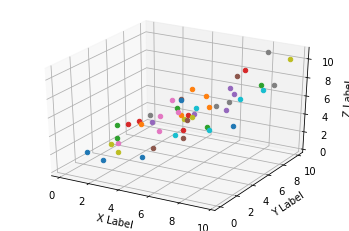

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = X.shape[0]

for xs, ys, zs in X:
    ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [18]:
def get_plane(X):
    n = X.shape[0]
    e = np.array([1]*n) # e.T
    c = 1/n * (e @ X) # точка на плоскости
    X_cent = X - c.T # центрированная матрица
    
    u, s, v = np.linalg.svd(X_cent)
    g = np.array([0, 0, 1])
    n = v.T @ g
    xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
    z = (-n[0]*xx-n[1]*yy - c.dot(n)) * 1. /n[2]
    
    plt3d = plt.figure().gca(projection='3d')
    plt3d.plot_surface(xx, yy, z, alpha=0.7)
    plt3d.scatter(xp, yp, zp)

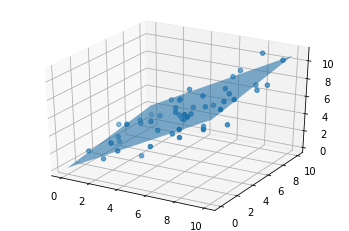

In [19]:
get_plane(X)

# Задание 6

In [ ]:
df = np.genfromtxt('signatureData2.csv', delimiter=',')
X1 = df[:, :2]
X2 = df[:, 2:]

In [ ]:
X1[:10]

In [ ]:
X2[:2]

In [ ]:
def get_transf(X1, X2):
    n = X1.shape[0]
    x1 = np.array([np.mean(X1[:, 0]), np.mean(X1[:, 1])])
    x2 = np.array([np.mean(X2[:, 0]), np.mean(X2[:, 1])])
    e = np.ones(n)
    print(e.shape)
    print(x1.shape)
    X1_cent = X1 - e.T @ x1
    X2_cent = X2 - e.T @ x2
    X1X2 = X1_cent.T @ X2_cent
    u, d, v = np.linalg.svd(X1X2)
    
    R = u @ v
    m = x2.T - R.T @ x.T

In [ ]:
get_transf(X1, X2)